# Main execution file

- provided in BO-HBM-ex
- Author: Quentin Ragueneau
- url: http://github.com/RagQ/BO-HBM-ex.git
- License: MIT


# Setup

 Run `pip install -r requirements.txt` before executing the notebook (required if you run it outside of `binder`)

## Information

This Python file provides frequency response of Duffing oscillator for differents set of parameters.

You can directly access to the [Bayesian Optimization notebook](OptiExp.ipynb).


In [1]:
from typing import Union
import fobjDuffing as fobj
import matplotlib.pyplot as plt
%matplotlib ipympl
import numpy
import os
import ipywidgets as ipw

In [2]:
plt.rcParams["text.usetex"] = True

### Duffing oscillator scheme and equation.


<img src="illus/duffing_scheme.png" width="200" ><br>


Non-linear problem solved in frequency domain (along $\omega$):

$m\ddot{q}(t)+\xi\dot{q}(t)+kq(t)+k_{nl}q^3(t)=f_0\cos(\omega t)$

with $m=1\,\mathrm{kg}$ and $k=1\,\mathrm{N}\cdot\mathrm{s}^{-1}$.

_$\xi$ and $k_{nl}$ are considered as variable parameters in this parametric study._


Define sets of Duffing oscillator parameters


In [3]:
ResName = "ParamDuffing"
knl_list = numpy.linspace(0.25, 2, 8)
xi_list = numpy.array([0.15, 0.3, 0.5, 1.0])

In [4]:
if not os.path.exists(ResName):
    os.mkdir(ResName)

In [5]:
data = []

### Parametric analysis


In [6]:
for xi in xi_list:
    for knl in knl_list:
        print("=== xi = {} - knl = {} ===".format(xi, knl))
        w, Drms, Arms = fobj.solveDuffing([xi, knl])
        data.append((xi, knl, w, Drms, Arms))

=== xi = 0.15 - knl = 0.25 ===
=== xi = 0.15 - knl = 0.5 ===
=== xi = 0.15 - knl = 0.75 ===
=== xi = 0.15 - knl = 1.0 ===
=== xi = 0.15 - knl = 1.25 ===
=== xi = 0.15 - knl = 1.5 ===
=== xi = 0.15 - knl = 1.75 ===
=== xi = 0.15 - knl = 2.0 ===
=== xi = 0.3 - knl = 0.25 ===
=== xi = 0.3 - knl = 0.5 ===
=== xi = 0.3 - knl = 0.75 ===
=== xi = 0.3 - knl = 1.0 ===
=== xi = 0.3 - knl = 1.25 ===
=== xi = 0.3 - knl = 1.5 ===
=== xi = 0.3 - knl = 1.75 ===
=== xi = 0.3 - knl = 2.0 ===
=== xi = 0.5 - knl = 0.25 ===
=== xi = 0.5 - knl = 0.5 ===
=== xi = 0.5 - knl = 0.75 ===
=== xi = 0.5 - knl = 1.0 ===
=== xi = 0.5 - knl = 1.25 ===
=== xi = 0.5 - knl = 1.5 ===
=== xi = 0.5 - knl = 1.75 ===
=== xi = 0.5 - knl = 2.0 ===
=== xi = 1.0 - knl = 0.25 ===
=== xi = 1.0 - knl = 0.5 ===
=== xi = 1.0 - knl = 0.75 ===
=== xi = 1.0 - knl = 1.0 ===
=== xi = 1.0 - knl = 1.25 ===
=== xi = 1.0 - knl = 1.5 ===
=== xi = 1.0 - knl = 1.75 ===
=== xi = 1.0 - knl = 2.0 ===


### Analysis


In [7]:
## Plotting functions
def plotting(
    w_list: Union[list, numpy.ndarray],
    Drms_find: Union[list, numpy.ndarray],
    Arms_find: Union[list, numpy.ndarray],
    param_select: float,
    param_list: list,
) -> None:
    fig, (ax1, ax2) = plt.subplots(1, 2, layout="constrained")
    for w, Drms, Arms, p in zip(w_list, Drms_find, Arms_find, param_list):
        ax1.plot(w, Drms, label=r"${}$".format(p))
        ax2.plot(w, Arms, label=r"${}$".format(p))
    ax1.set(xlabel=r"$\omega\,[\mathrm{rad}\cdot\mathrm{s}^{-1}]$")
    ax1.set(ylabel=r"$q_{\rm RMS}\,[\mathrm{m}]$")
    ax1.set(
        title=r"${} = {}\,[{}]$".format(
            param_select["name"], param_select["value"], param_select["unit"]
        )
    )
    ax1.legend(
        loc="upper left", title=f"$k_{{nl}}\,[\mathrm{{N}}\cdot\mathrm{{m}}^{{-3}}]$"
    )
    ax1.set(xlim=(0, 2.5))
    ax1.set(ylim=(0, 2.6))
    ax2.set(xlabel=r"$\omega\,[\mathrm{rad}\cdot\mathrm{s}^{-1}]$")
    ax2.set(ylabel=r"${\ddot q}_{\rm RMS}\,[\mathrm{m}\cdot\mathrm{s}^{-2}]$")
    ax2.set(
        title=r"$\xi = {}\,[\mathrm{{kg}}\cdot\mathrm{{s}}^{{-1}}]$".format(xi_select)
    )
    ax2.set(xlim=(0, 2.5))
    ax2.set(ylim=(0, 2.6))
    ax2.legend(
        loc="upper left", title=f"$k_{{nl}}\,[\mathrm{{N}}\cdot\mathrm{{m}}^{{-3}}]$"
    )


class plotting_full:
    def __init__(self, data: list = None, xi: float = 0.15, knl: float = 0.25) -> None:
        self.fig, (self.ax1, self.ax2) = plt.subplots(
            1,
            2,
            layout="constrained",
        )
        self.l1 = None
        self.l2 = None
        self.ax1.set_aspect("equal")
        self.ax2.set_aspect("equal")
        if data:
            self.update(data, xi, knl)

    def update(self, data: list, xi: float, knl: float) -> None:
        Drms_find = [
            content[3] for content in data if content[0] == xi and content[1] == knl
        ]
        Arms_find = [
            content[3] for content in data if content[0] == xi and content[1] == knl
        ]
        w_list = [
            content[2] for content in data if content[0] == xi and content[1] == knl
        ]
        #
        if not self.l1:
            (self.l1,) = self.ax1.plot(w_list[0], Drms_find[0])
            (self.l2,) = self.ax2.plot(w_list[0], Arms_find[0])
            self.ax1.set(xlabel=r"$\omega\,[\mathrm{rad}\cdot\mathrm{s}^{-1}]$")
            self.ax1.set(ylabel=r"$q_{\rm RMS}\,[\mathrm{m}]$")
            self.ax1.set(xlim=(0, 2.5))
            self.ax1.set(ylim=(0, 2.6))
            self.ax2.set(xlabel=r"$\omega\,[\mathrm{rad}\cdot\mathrm{s}^{-1}]$")
            self.ax2.set(
                ylabel=r"${\ddot q}_{\rm RMS}\,[\mathrm{m}\cdot\mathrm{s}^{-2}]$"
            )
            self.ax2.set(xlim=(0, 2.5))
            self.ax2.set(ylim=(0, 2.6))
        else:
            self.l1.set_data(w_list[0], Drms_find[0])
            self.l2.set_data(w_list[0], Arms_find[0])
        title_text = r"$\xi = {}\,\mathrm{{kg}}\cdot\mathrm{{s}}^{{-1}}\,,\,k_{{nl}} = {}\,\mathrm{{N}}\cdot\mathrm{{m}}^{{-3}}$".format(
            xi, knl
        )
        self.ax1.set(title=title_text)
        self.ax2.set(title=title_text)
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()


#### Show parametric results


interactive(children=(SelectionSlider(description='$\\xi$', options=(0.15, 0.3, 0.5, 1.0), value=0.15), Select…

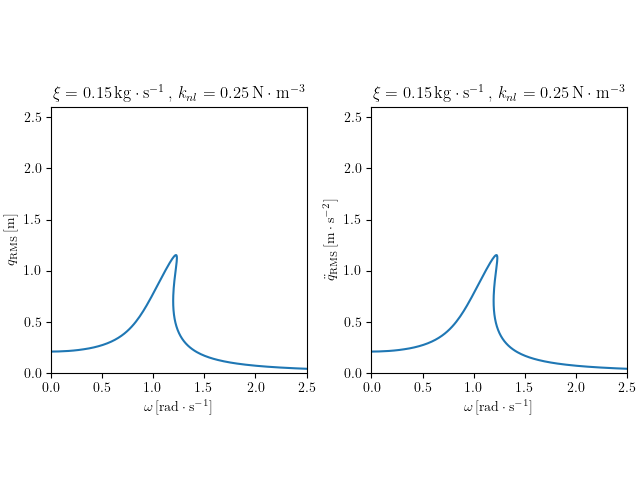

In [ ]:
xi_slider = ipw.SelectionSlider(
    options=xi_list,
    value=xi_list[0],
    description=r"$\xi$",
    disabled=False,
    continuous_update=True,
    orientation="horizontal",
    readout=True,
)
knl_slider = ipw.SelectionSlider(
    options=knl_list,
    value=knl_list[0],
    description=r"$k_{{nl}}$",
    disabled=False,
    continuous_update=True,
    orientation="horizontal",
    readout=True,
)
plot = plotting_full()
#
gui = ipw.interact(plot.update, data=ipw.fixed(data), xi=xi_slider, knl=knl_slider)


#### Show results for some values of $k_{nl}$ and $\xi =0.15\,\mathrm{kg}\cdot s^{-1}$


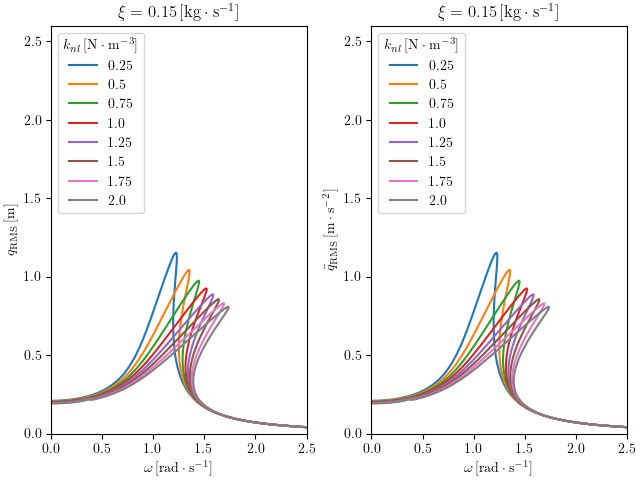

In [9]:
xi_select = 0.15  # Select xi = 0.15 kg/s
assert xi_select in xi_list, "xi_select not in xi_list"
#
Drms_find = [content[3] for content in data if content[0] == xi_select]
Arms_find = [content[3] for content in data if content[0] == xi_select]
w_list = [content[2] for content in data if content[0] == xi_select]
#
plotting(
    w_list,
    Drms_find,
    Arms_find,
    {
        "name": f"\\xi",
        "value": xi_select,
        "unit": "\mathrm{{kg}}\cdot\mathrm{{s}}^{{-1}}",
    },
    knl_list,
)


#### Show results for some values of $\xi$ and $k_{nl}=2\,\mathrm{N}\cdot m^{-3}$


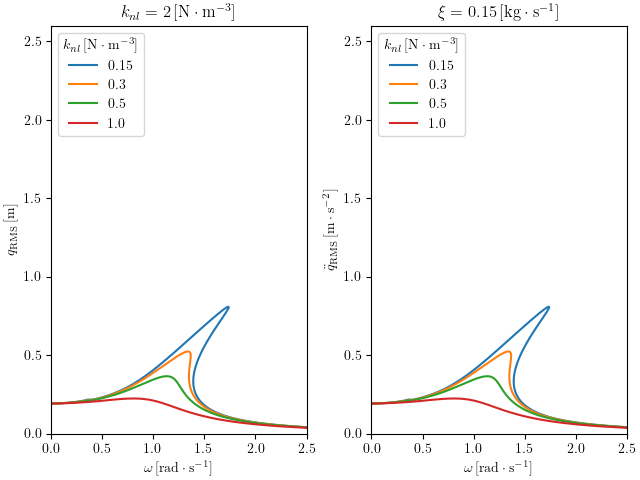

In [10]:
knl_select = 2  # Select knl = 2 N/m3
assert knl_select in knl_list, "knl_select not in knl_list"
#
Drms_find = [content[3] for content in data if content[1] == knl_select]
Arms_find = [content[3] for content in data if content[1] == knl_select]
w_list = [content[2] for content in data if content[1] == knl_select]
#
plotting(
    w_list,
    Drms_find,
    Arms_find,
    {
        "name": "k_{nl}",
        "value": knl_select,
        "unit": "\mathrm{{N}}\cdot\mathrm{{m}}^{{-3}}",
    },
    xi_list,
)